<a href="https://colab.research.google.com/github/akalpit23/Explainable-techniques/blob/main/Assignment-6/Explainable_Techniques_Assignment_06.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# AIPI 590 - XAI | Assignment #06



## Akalpit Dawkhar

### **Explainable Techniques-2**

### Overview

In [2]:
# Please use this to connect your GitHub repository to your Google Colab notebook
# Connects to any needed files from GitHub and Google Drive
import os

# Remove Colab default sample_data
!rm -r ./sample_data

# Clone GitHub files to colab workspace
repo_name = "Explainable-techniques/Assignment-6/" # Change to your repo name
git_path = 'https://github.com/akalpit23/Explainable-techniques.git' #Change to your path
!git clone "{git_path}"

# Install dependencies from requirements.txt file
!pip install -q -r "{os.path.join(repo_name,'requirements.txt')}" #Add if using requirements.txt

# Change working directory to location of notebook
notebook_dir = 'Assignment-6/'
path_to_notebook = os.path.join(repo_name,notebook_dir)
%cd "{path_to_notebook}"
%ls

Cloning into 'Explainable-techniques'...
remote: Enumerating objects: 181, done.
remote: Counting objects: 100% (181/181), done.
remote: Compressing objects: 100% (141/141), done.
remote: Total 181 (delta 94), reused 97 (delta 38), pack-reused 0 (from 0)
Receiving objects: 100% (181/181), 6.57 MiB | 7.69 MiB/s, done.
Resolving deltas: 100% (94/94), done.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 2.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 427.3/427.3 kB 6.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 540.1/540.1 kB 13.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 32.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 522.1/522.1 kB 11.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.8/35.8 MB 11.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

# 1. Importing neccessary libraries

In [3]:
!pip install -q -r /content/Explainable-techniques/Assignment-6/requirements.txt

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.inspection import PartialDependenceDisplay ,partial_dependence
from alibi.explainers import ALE, plot_ale
from pycebox.ice import ice, ice_plot

# 2. Loading the dataset

In [5]:
# Step 2: Load your dataset
df = sns.load_dataset('titanic')

df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


# 3. Exploratory Data Analysis

The correlation heatmap provides insights into the relationships between features in the Titanic dataset. For example, we observe high correlations between certain features such as 'fare' and 'class', which may influence the model's predictions. The heatmap helps identify which features are highly correlated, which may lead to multicollinearity issues. Such correlated features might have an impact on the interpretability and accuracy of our model. Overall, the EDA showed that there are several meaningful relationships in the dataset that can be exploited by the model.

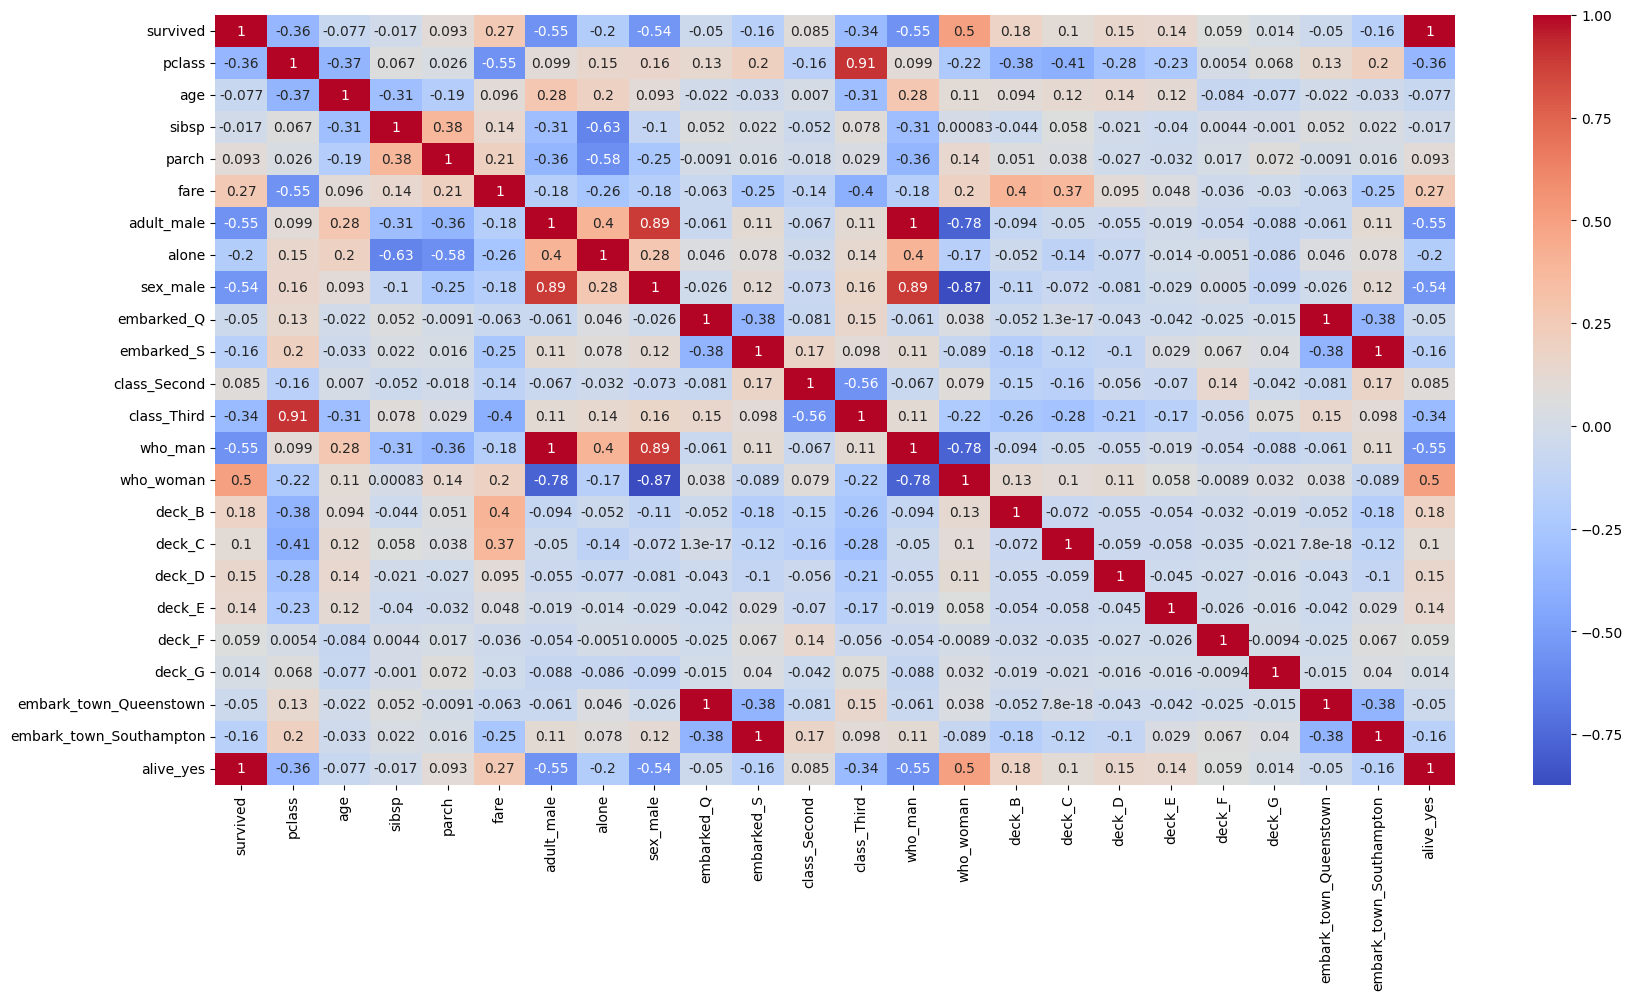

In [6]:
# Convert categorical variables to numerical via one-hot encoding
df_encoded = pd.get_dummies(df, drop_first=True)

# Drop rows with missing values for simplicity
df_encoded = df_encoded.dropna()

# Visualize correlation heatmap for numeric columns only
plt.figure(figsize=(20,10))
corr_matrix = df_encoded.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

# Show the plot
plt.show()

# Step 4: Data Preprocessing
X = df_encoded.drop('survived', axis=1)  # Assuming "survived" is the target variable
y = df_encoded['survived']

# 4. Model Selection and Training

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [8]:
# Display model evaluation report (Optional)
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        87
           1       1.00      1.00      1.00        56

    accuracy                           1.00       143
   macro avg       1.00      1.00      1.00       143
weighted avg       1.00      1.00      1.00       143



# 5. Partial Dependance Plots

The Partial Dependence Plots (PDP) show the average effect of individual features on the predicted outcome. For instance, from the PDP of 'age' and 'fare', we see that younger passengers and those who paid higher fares generally have a higher chance of survival, which aligns with our expectations. The PDPs for categorical features like 'class_Second' and 'class_Third' reveal how different passenger classes impact survival. The PDPs allow us to visualize the marginal effect of a feature while averaging out the effects of other features, providing a global view of feature influence.

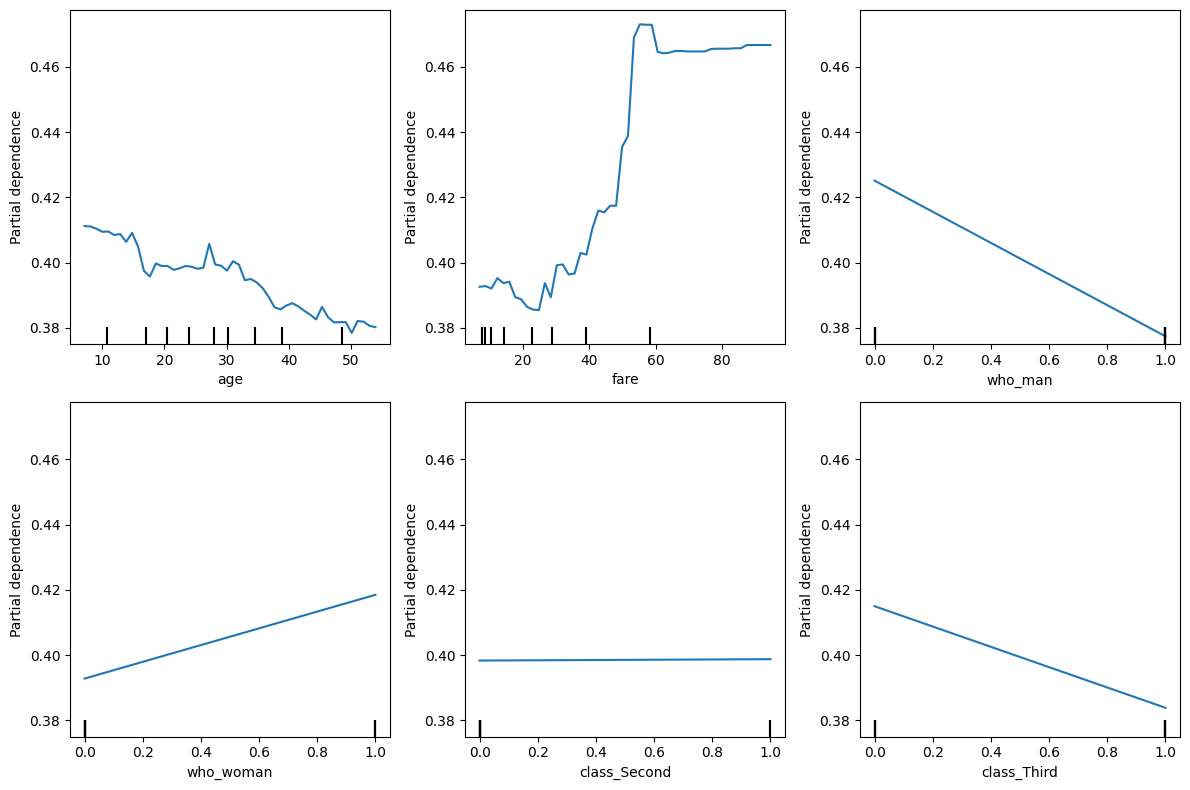

In [21]:
# Define the features you want to visualize
features = ['age', 'fare', 'who_man', 'who_woman','class_Second', 'class_Third']

# Define the number of rows and columns for the plot grid
n_rows = 2
n_cols = 3

# Create the figure
fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 4, n_rows * 4))
axes = axes.ravel()  # Flatten the 2D array of axes

# Create PartialDependenceDisplay object
pdp = PartialDependenceDisplay.from_estimator(
    model, X_test, features,
    n_cols=n_cols, grid_resolution=50,
    ax=axes
)

# Adjust the layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()

# 6. ALE Plots

The ALE plots provide a similar insight to the PDPs but with a key difference in the method of calculation. ALE plots show the localized effect of features, which reduces the bias introduced by correlated features. From the ALE plots, we see that features such as 'age' and 'fare' have a non-linear relationship with the predicted survival probability. Compared to PDPs, ALE plots are more robust to feature correlations, making them a preferable choice when dealing with datasets with highly correlated features. For instance, the impact of 'fare' is more nuanced in ALE, showing different slopes, indicating a varying effect based on fare ranges.

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X

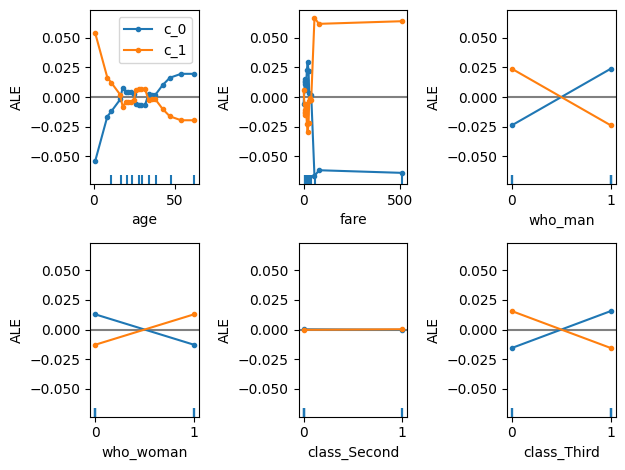

In [33]:
ale_explainer = ALE(model.predict_proba, feature_names=X_train.columns)
ale_exp = ale_explainer.explain(X_test.values)
plot_ale(ale_exp, features=features)
plt.show()

# 7. ICE plot

The ICE plots provide a more granular view compared to PDPs by showing the effect of a feature on individual data points instead of averaging over all data points. This allows us to observe heterogeneous effects, which can be particularly useful when the feature effects vary significantly across instances. In our ICE plots, we observe that the impact of 'fare' and 'age' on survival is not consistent for all passengers. For some passengers, higher fares significantly increased their chances of survival, while for others, the effect was less pronounced.

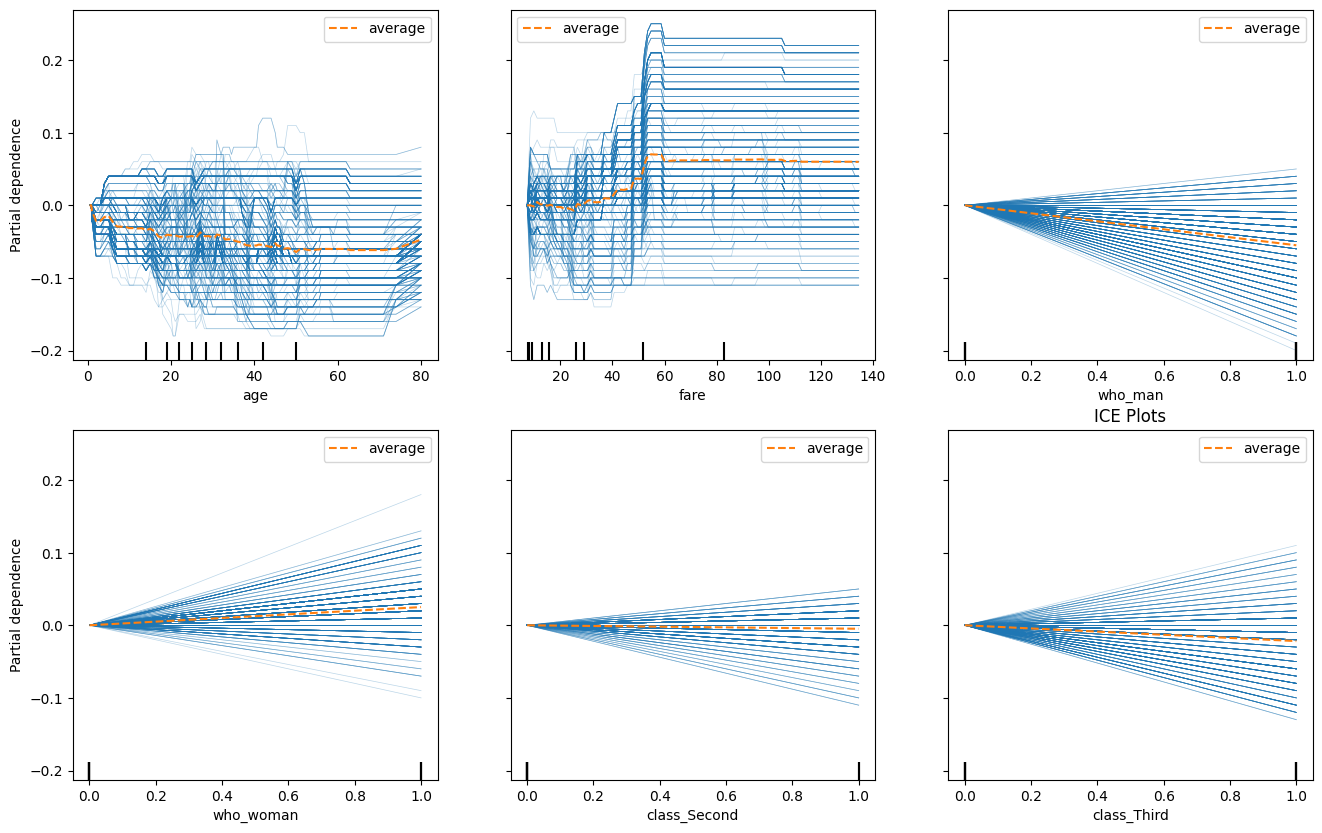

In [35]:
fig, ax = plt.subplots(figsize=(16, 10))
PartialDependenceDisplay.from_estimator(model, X_train, features, kind='both', centered=True, ax=ax)
plt.title('ICE Plots')
plt.show()

# 8. Conclusion

While both PDP and ALE provide insights into feature effects, ALE is less prone to bias due to feature correlations. The PDPs tend to average the effect of a feature across all observations, which can lead to misleading interpretations when features are correlated. In contrast, ALE focuses on the local impact, making it more suitable when there is strong correlation between features, as seen in the Titanic dataset. In our analysis, the PDP for 'fare' showed a consistent positive effect, while the ALE plot revealed more variation, indicating that the impact of fare on survival is context-dependent.

- **Feature Correlations**: The EDA revealed significant correlations between certain features, such as 'fare' and 'class'. This implies potential multicollinearity, which could affect model interpretability.
- **PDP Insights**: The PDPs provided a global view of feature effects, showing that younger age and higher fare positively impact survival probability.
- **ALE vs. PDP**: ALE plots showed a more nuanced effect of features compared to PDPs, particularly for correlated features like 'fare'. This demonstrates the advantage of ALE plots in handling feature correlation.
- **Heterogeneous Effects**: The ICE plots revealed that the effect of features like 'fare' and 'age' varies across different passengers, highlighting individual-level differences that are not captured by PDPs or ALE plots.

Overall, the combination of PDP, ALE, and ICE plots provides a comprehensive understanding of how different features influence the model's predictions, both at a global and local level.